In [27]:
import numpy as np
import matplotlib as plt
import pandas as pd
import geopandas as gpd

資料來源是從台電的公開網站上下載的。來源網址：https://www.taipower.com.tw/tc/page.aspx?mid=96

In [28]:
#台電104、105年售電資料讀入
sheet_name_a = [10412,10512,10612,10712]
TPV104 = pd.read_excel('TP_vill_use2.xlsx' ,sheet_name=str(sheet_name_a[0]))
TPV105 = pd.read_excel('TP_vill_use2.xlsx' ,sheet_name=str(sheet_name_a[1]))

In [29]:
#台灣村里界圖層
Twd_v = gpd.read_file('SHP/基礎行政界_2015.shp', encoding='utf-8')
Twd_v.columns = ['VName','ID_2015','郵遞區','geometry']

In [30]:
#表格欄位整理
TPV104 = TPV104.drop("當月：104年12月，當年累計：104年1~12月", axis=1)
TPV104 = TPV104.drop("Unnamed: 7", axis=1)
TPV105 = TPV105.drop(TPV105.columns[7], axis=1)
TPV104.columns = ['郵遞區', '行政區', '用電類', '用戶數', '契約量', '售電度', '年售電']
TPV105.columns = ['郵遞區', '行政區', '用電類', '用戶數', '契約量', '售電度', '年售電']


In [31]:
df = pd.DataFrame(TPV104[(TPV104['用電類']==TPV104['用電類'][0])])
df2 = pd.DataFrame(TPV105[(TPV105['用電類']==TPV105['用電類'][0])])
df['郵遞區']=df['郵遞區'].astype('int64')
df2['郵遞區']=df2['郵遞區'].astype('int64')
TW_104 = pd.merge(Twd_v,df,on='郵遞區')
TW_105 = pd.merge(Twd_v,df2,on='郵遞區')
TW_10405 = pd.merge(TW_104,df2,on='郵遞區')

繪製空間地圖

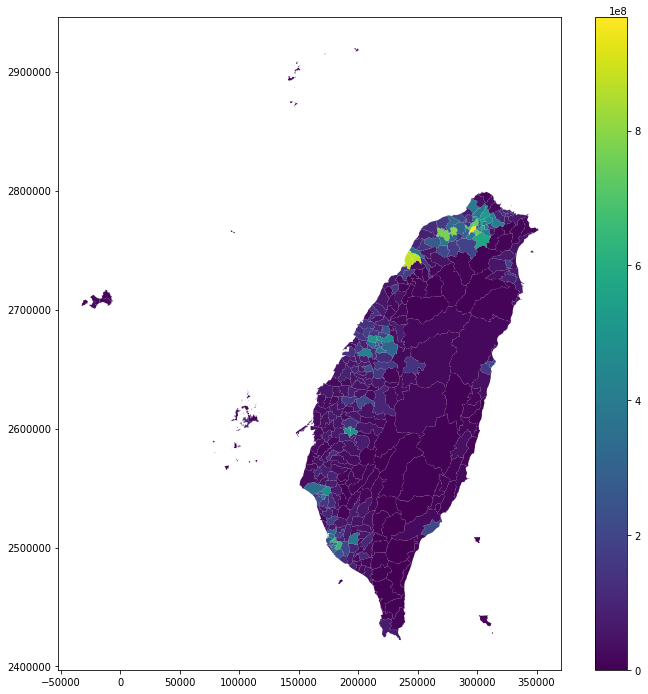

In [82]:
TW_104['年售電'] = TW_104['年售電'].astype('float')
TW_104.plot(column='年售電', figsize=(12, 12), legend=True)

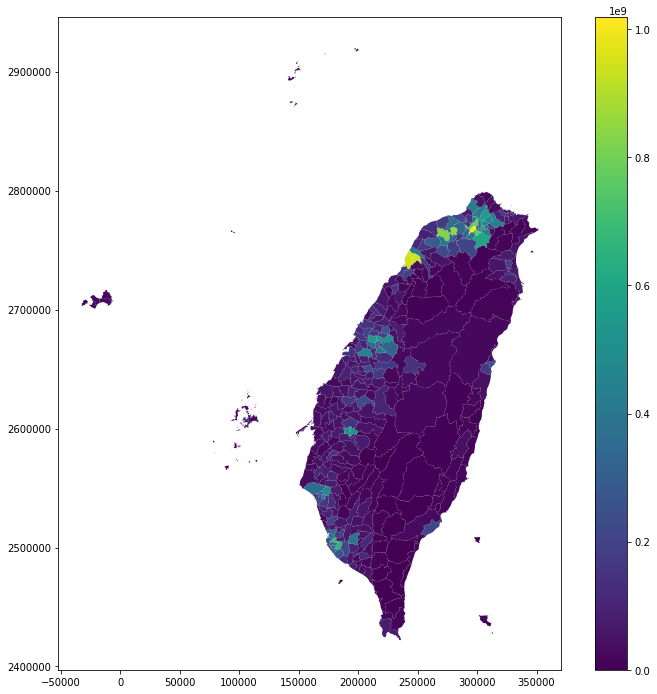

In [83]:
TW_105['年售電'] = TW_105['年售電'].astype('float')
TW_105.plot(column='年售電', figsize=(12, 12), legend=True)

In [34]:
TW_10405['glow']=(TW_10405['年售電_x']-TW_10405['年售電_y'])/TW_10405['年售電_x']
TW_10405.head()

In [68]:
TW_10405['indexx'] = (TW_10405['glow']>np.mean(TW_10405['glow']))
a = list()
for i in range(0,(len(TW_10405['indexx'])-1)) :
    if TW_10405['indexx'][i]==True:
        a.append(1)
    else:
        a.append(0)
    

In [80]:
a = pd.DataFrame(a)
TW_10405_2 = pd.concat([TW_10405,a],axis=1)
TW_10405_2.columns = ['VName',  'ID_2015',      '郵遞區', 'geometry',    '行政區_x',    '用電類_x',
          '用戶數_x',    '契約量_x',    '售電度_x',    '年售電_x',    '行政區_y',    '用電類_y',
          '用戶數_y',    '契約量_y',    '售電度_y',    '年售電_y',     'glow',   'indexx','a']
TW_10405_2['a'] = TW_10405_2['a'].astype('str')
TW_10405_2.head()

,VName,ID_2015,郵遞區,geometry,行政區_x,用電類_x,用戶數_x,契約量_x,售電度_x,年售電_x,行政區_y,用電類_y,用戶數_y,契約量_y,售電度_y,年售電_y,glow,indexx,a
0,連江縣南竿鄉,09007010,209,(POLYGON ((146283.2582796279 2886428.868020864...,南竿,1表燈非營業用,2254,286.0,828201.0,13843708.0,南竿,1表燈非營業用,2335,286.0,960145.0,15014133.0,-0.084546,False,0.0
1,連江縣北竿鄉,09007020,210,(POLYGON ((148069.4182527724 2897738.530008169...,北竿,1表燈非營業用,653,10.0,605892.0,3864188.0,北竿,1表燈非營業用,658,10.0,620640.0,4132949.0,-0.069552,False,0.0
2,連江縣莒光鄉,09007030,211,"(POLYGON ((146620.702859706 2871134.949624868,...",莒光,1表燈非營業用,483,26.0,181220.0,3030316.0,莒光,1表燈非營業用,482,26.0,191510.0,3263453.0,-0.076935,False,0.0
3,連江縣東引鄉,09007040,212,(POLYGON ((190278.9564607803 2894870.209207388...,東引,1表燈非營業用,410,0.0,0.0,3492788.0,東引,1表燈非營業用,401,0.0,0.0,3744922.0,-0.072187,False,0.0
4,金門縣金城鎮,09020010,893,"(POLYGON ((-20235.11234082539 2700859.5512958,...",金城,1表燈非營業用,7257,30.0,13462.0,33087700.0,金城,1表燈非營業用,7548,32.0,17576.0,35738671.0,-0.080120,False,0.0


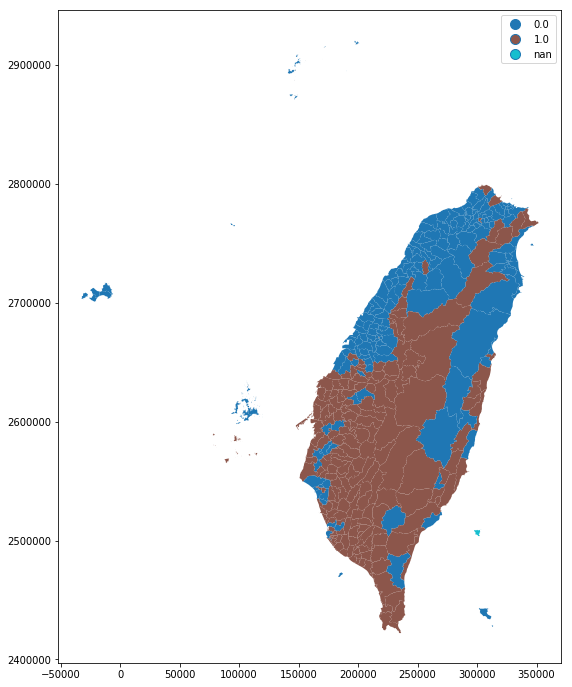

In [81]:
TW_10405_2.plot(column='a', figsize=(12, 12), legend=True)
#0代表該鄉鎮105年度用電成長率低於全國平均，1代表高於全國平均成長率。